In [1]:
import sys
sys.path.append("../")
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch
from lora_diffusion import tune_lora_scale, patch_pipe
import open_clip
from PIL import Image
from disen_net import Image_adapter

model_id = "/DATA/DATANAS1/zhangyip/models/stable-diffusion-2-1-base"

with torch.no_grad():
    pipe = StableDiffusionPipeline.from_pretrained(model_id).to("cuda")
    img_model, _, preprocess = open_clip.create_model_and_transforms('ViT-H-14', pretrained='laion2b_s32b_b79k')
    img_model = img_model.to("cuda")

/home/chenhong/anaconda3/envs/diffusion/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [2]:
import os
dir_path = "./output_dreambooth/our_versions/adapter_weight0.1_scenario1e-3_disen1.0/checkpoint"
patch_pipe(
    pipe,
    os.path.join(dir_path, "lora_weight_e6_s1800.pt"),
    patch_text=False,
    patch_ti=False,
    patch_unet=True,
)
adapter = Image_adapter().to("cuda")
info = torch.load(os.path.join(dir_path, "lora_weight_e6_s1800.img_adapter.pt"))
adapter.load_state_dict(info)
ref_image = preprocess(Image.open("/DATA/DATANAS1/chenhong/diffusion_research/dreambooth_data/backpack/01.jpg")).unsqueeze(0).to("cuda")

LoRA : Patching Unet


  0%|          | 0/50 [00:00<?, ?it/s]

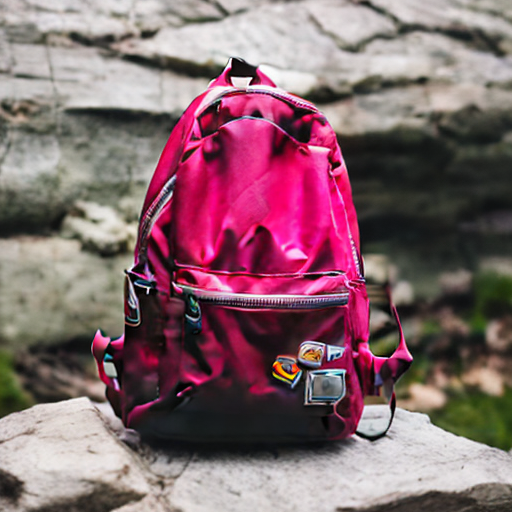

In [3]:
from visualization import joint_visualization
prompt = "a <s1>|<s2> backpack"
tune_lora_scale(pipe.unet, 1.0)
image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=0.0, img_adapter=adapter)[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

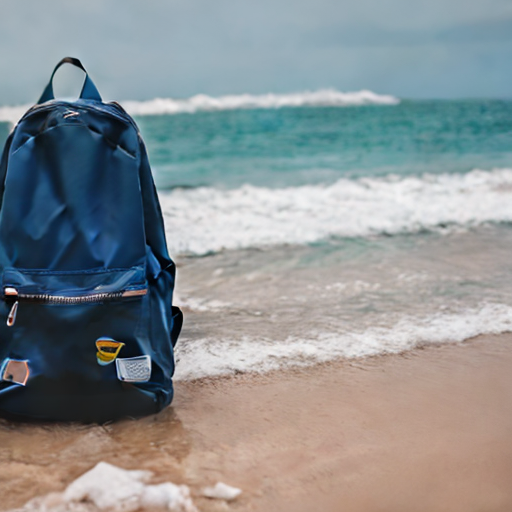

In [4]:
prompt = "a <s1>|<s2> backpack on the beach"
image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=0.0, img_adapter=adapter)[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

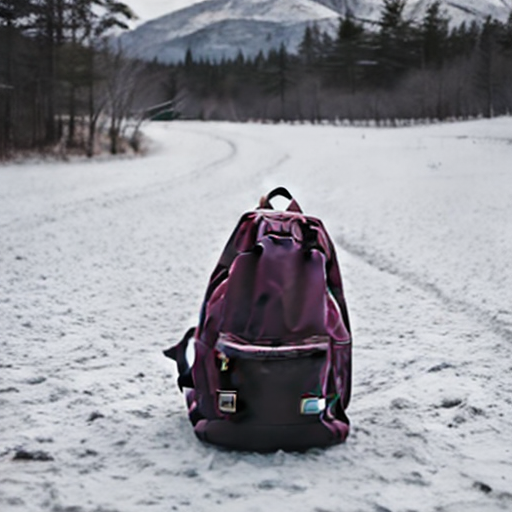

In [5]:
prompt = "a <s1>|<s2> backpack in the snow"
image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=0.0, img_adapter=adapter)[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

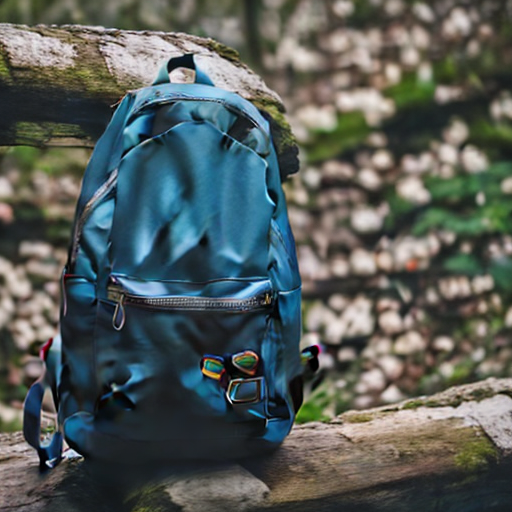

In [6]:
prompt = "a <s1>|<s2> backpack in the forest"
image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=0.2, img_adapter=adapter)[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

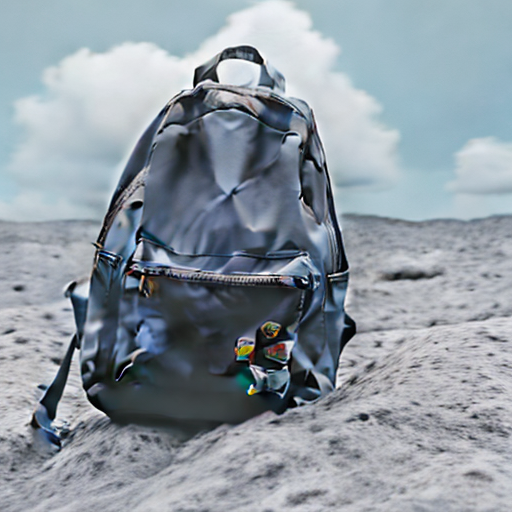

In [7]:
prompt = "a <s2>|<s2> backpack on the moon"
image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=0.2, img_adapter=adapter)[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

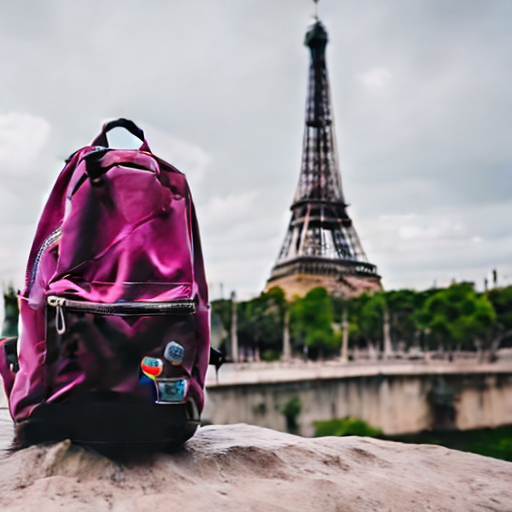

In [8]:
prompt = "a <s1>|<s2> backpack with the Eiffel Tower in the background"
image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=0.0, img_adapter=adapter)[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

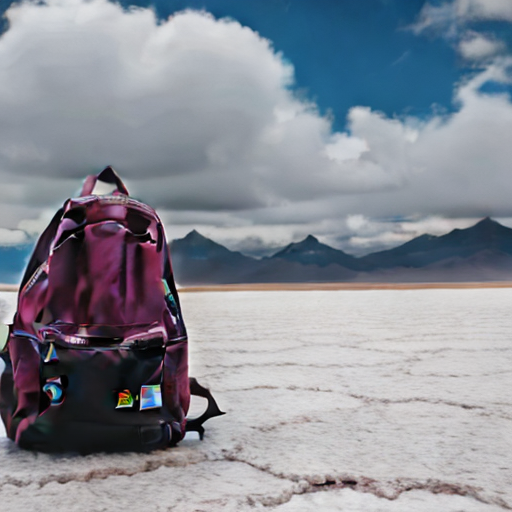

In [9]:
prompt = "a <s1>|<s2> backpack in the Bolivian salt flats"
image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=0.2, img_adapter=adapter)[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

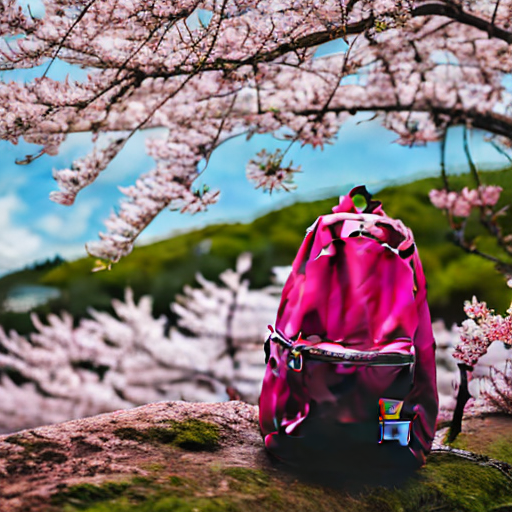

In [14]:
prompt = "a <s1>|<s2> backpack under a sakura tree"
image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=0.0, img_adapter=adapter)[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

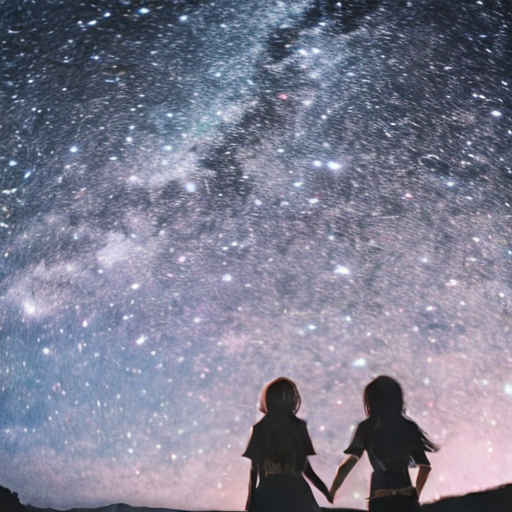

In [18]:
prompt = "a <s1>|<s2> backpack under a starry sky"
image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=0.0, img_adapter=adapter)[0]
image